# **Aviation Accident Analysis: Identifying Trends & Safety Improvements**  

## Inspiration
***Hope it will teach us how to improve the quality and safety of traveling by Airplane.***

## **Introduction**  

Aviation safety has significantly improved over the decades due to advancements in technology, stricter regulations, and lessons learned from past accidents. However, accidents still occur, and understanding their causes is crucial for making air travel even safer. This project analyzes the **NTSB (National Transportation Safety Board) aviation accident database**, which contains records of civil aviation accidents and incidents from **1962 to 2023**.  

The dataset includes **detailed information about each accident**, such as **aircraft type, engine specifications, weather conditions, phase of flight, severity of damage, and geographical location**. By examining trends and identifying contributing factors, this analysis aims to uncover **patterns in aviation accidents** and provide insights that can help improve **aviation safety, pilot training, and aircraft design**.  

## **Objectives**  
This study focuses on:  

1. **Identifying Trends and Contributing Factors**  
   - Analyzing how accident frequency has changed over time.  
   - Understanding which aircraft types, engine configurations, and flight phases are most prone to accidents.  
   - Examining the impact of **weather conditions** and **human error** on accident rates.  

2. **Geographical Analysis**  
   - Determining which regions or states experience more aviation accidents.  
   - Identifying whether certain environmental or regulatory factors contribute to higher accident rates in specific areas.  

3. **Aircraft and Engine Risk Assessment**  
   - Investigating whether certain **aircraft models, engine types, or manufacturers** are more prone to accidents.  
   - Analyzing the difference between **amateur-built and factory-built aircraft** in terms of safety.  

## **Data & Methodology**  
The dataset has undergone **several revisions and cleaning steps**, including:  
- **Original Data**: Raw dataset imported from the CSV file.  
- **Processed Data (data_r1)**: A refined version of the dataset that removes excessive missing values while preserving key insights.  

The analysis includes **trend analysis, statistical evaluations, and visualizations** to uncover insights. Additionally, **machine learning techniques** may be applied to predict accident risk based on key aircraft and flight parameters.  

By the end of this study, we hope to gain a **better understanding of aviation accident trends** and propose **recommendations for improving air travel safety**.

In [73]:
# Core Libraries
import pandas as pd
import numpy as np  

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time Processing
from datetime import datetime

# Machine Learning Libraries (If applying ML models)
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Data preprocessing
from sklearn.ensemble import RandomForestClassifier  # Example model for accident prediction
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output


In [74]:
original_data = pd.read_csv("AviationData.csv")
original_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
data = original_data.copy(deep= True)
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
shape = data.shape
print(f"There are {shape[0]} of rows in the Dataset")
print(f"There are {shape[1]} of Columns in the Dataset")

There are 88890 of rows in the Dataset
There are 31 of Columns in the Dataset


In [5]:
# brief overview of data on how it's look like. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88890 entries, 0 to 88889
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88890 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

- There are lot of null values present in the data - Can be altered as per our need
- Categorical Columns as objects - Engine.Type, Category might useful features
- Two date columns as object - can be usefull to do trend Analysis
- FAR.Description is sus - Need more information on that.

***Let's Have a breif overview of everything - Null Count, Categorical Columns, Duplicates and other.***<br>
let's Create a function for it

In [6]:
# Check for overall duplicated values

data.duplicated().sum()

0

There are No duplicated values in the dataset.

In [7]:
# To create a funtion that can get
# col dtype
# Data No. of Unique values
# col uniques names and value counts if less than <= 13
# col null values count
# col null values percentage

def column_summary(data, col):
    print("*"*5, "Column: ",col.title(),"|dtype:",data[col].dtype,"*"*5)
    print(f"\nUnique Values: {data[col].nunique()}")
    
    if data[col].nunique() <= 13:
        print(f"- Those are {data[col].unique()}\n")
        print("-"*5, "Value Counts","-"*5)
        print(data[col].value_counts().reset_index())
    if data[col].duplicated().sum() > 2:
        print("Contains duplicates: Yes")
   
    null_count = data[col].isnull().sum()
    total_count = data.shape[0]
    print(f"\nNull Count: {null_count}")
    print(f"Null Percentage: {round(null_count*100/total_count,2)}")
    print("_"*50)
    
    
    
        

In [8]:
print(" "*25, "COLUMN SUMMARY\n", " "*25)
for col in data.columns:
    column_summary(data= data, col= col)

                          COLUMN SUMMARY
                          
***** Column:  Event.Id |dtype: object *****

Unique Values: 87951
Contains duplicates: Yes

Null Count: 1
Null Percentage: 0.0
__________________________________________________
***** Column:  Investigation.Type |dtype: object *****

Unique Values: 3
- Those are ['Accident' 'Incident' '25-09-2020']

----- Value Counts -----
  Investigation.Type  count
0           Accident  85015
1           Incident   3874
2         25-09-2020      1
Contains duplicates: Yes

Null Count: 0
Null Percentage: 0.0
__________________________________________________
***** Column:  Accident.Number |dtype: object *****

Unique Values: 88863
Contains duplicates: Yes

Null Count: 1
Null Percentage: 0.0
__________________________________________________
***** Column:  Event.Date |dtype: object *****

Unique Values: 14782
Contains duplicates: Yes

Null Count: 1
Null Percentage: 0.0
__________________________________________________
***** Column: 

In [9]:
# def unique_values(data,col):
#     if data[col].nunique() <= 13:
#         print('-'*10)
#         print(f"\nUnique Values in {col}: {data[col].unique()}")
#     else:
#         print('-'*10)
#         print(f"\n{col} has {data[col].nunique()} unique Values")
        
# for col in data.columns:
#     unique_values(data= data, col= col)

***Nulls values seems to larger in the dataset, Let's find how much of data has null values***

In [10]:
total_cells = np.product(data.shape)

total_null_count = data.isna().sum().sum()

overall_null_percentage = total_null_count*100//total_cells

print(f"Null values occupies {overall_null_percentage}% of data in the whole dataset")

Null values occupies 20% of data in the whole dataset


### For some rows multiple columns has null values - It doesn't make much sense and also difficult to get insights
1. We can drop those method using isna method with masking
2. Keeping only those rows which have null values for less than 10 columns
3. I came to number 10 by testing different values and percentage of data we might lose

In [11]:
data_r1 = data[data.isna().sum(axis=1) < 10]
data_r1.isna().sum(axis=1), data_r1.shape

(0        9
 1        8
 2        9
 3        8
 5        5
         ..
 88870    7
 88874    4
 88877    6
 88878    4
 88887    5
 Length: 83743, dtype: int64,
 (83743, 31))

In [13]:
# Percentage of data lost and Nullvalues percentage of whole dataset.

len_after = data_r1.shape[0]

total_len_of_data = data.shape[0]

print(f"Total data lost: {(total_len_of_data - len_after)*100/total_len_of_data}%")

total_cells = np.product(data_r1.shape)

total_null_count = data_r1.isna().sum().sum()

overall_null_percentage = total_null_count*100/total_cells

print(f"Null values occupies {overall_null_percentage}% of data in the whole dataset")

Total data lost: 5.790302621217235%
Null values occupies 19.37101724053585% of data in the whole dataset


In [14]:
data_r1.shape

(83743, 31)

#### Here we have removed the rows/records that are having null values more than or equal to 10 columns out of 31 columns. The amount of data we lost is 5.79%. Total Null value percentage is not decreased much. We'll deal with null values columns by column. Also store the important columns that needed to do the Analysis.

### Observed that many columns have Unknown values that are written in different formats

In [15]:
data_r1 = data_r1.replace(["Unk", "unknown", "UNK"], "Unknown")
data_r1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017


In [16]:
# Changing the Columns into Categorical Columns
 
categorical_columns = [col for col in data_r1.columns if data_r1[col].nunique() <= 26]

for col in categorical_columns:
    data_r1[col] = data_r1[col].astype("category")

In [17]:
# Event.Date into datetime type

data_r1['Event.Date'] = pd.to_datetime(data_r1['Event.Date'])
data_r1['Event.Date'].dtype

dtype('<M8[ns]')

In [18]:
data_r1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83743 entries, 0 to 88887
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                83743 non-null  object        
 1   Investigation.Type      83743 non-null  category      
 2   Accident.Number         83743 non-null  object        
 3   Event.Date              83743 non-null  datetime64[ns]
 4   Location                83733 non-null  object        
 5   Country                 83551 non-null  object        
 6   Latitude                33337 non-null  object        
 7   Longitude               33327 non-null  object        
 8   Airport.Code            49851 non-null  object        
 9   Airport.Name            52391 non-null  object        
 10  Injury.Severity         83542 non-null  object        
 11  Aircraft.damage         81863 non-null  category      
 12  Aircraft.Category       29862 non-null  category   

In [19]:
data_r1.describe()

,Event.Date,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,83743,73727.000000,73017.000000,73652.000000,79048.00000
mean,1999-02-22 14:20:57.590485248,0.497511,0.263377,0.340615,4.68738
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.00000
25%,1988-08-12 00:00:00,0.000000,0.000000,0.000000,0.00000
50%,1997-07-25 00:00:00,0.000000,0.000000,0.000000,1.00000
75%,2008-10-26 00:00:00,0.000000,0.000000,0.000000,2.00000
max,2022-12-26 00:00:00,270.000000,137.000000,171.000000,699.00000
std,NaN,3.625676,1.282835,1.526999,25.61815


In [20]:
data_r1.describe(include= "O")

,Event.Id,Accident.Number,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Registration.Number,Make,Model,FAR.Description,Air.carrier,Report.Status,Publication.Date
count,83743,83743,83733,83551,33337,33327,49851,52391,83542,83675,83728,83707,29841,15805,79701,71061
unique,82872,83727,24700,174,24714,26251,10238,24679,64,75637,8007,11608,29,13052,17064,2179
top,20001212X19172,CEN22LA149,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,NONE,Cessna,152,091,Pilot,Probable Cause,25-09-2020
freq,3,2,431,81087,19,24,1483,235,65236,340,21654,2327,18165,257,60700,16102


In [21]:
data_r1.describe(include= "category")

,Investigation.Type,Aircraft.damage,Aircraft.Category,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
count,83743,81863,29862,83731,81559.0,80083,11076,80519,82124,60672
unique,2,4,14,2,7.0,11,3,26,3,12
top,Accident,Substantial,Airplane,No,1.0,Reciprocating,NSCH,Personal,VMC,Landing
freq,81142,62245,25600,75478,68807.0,68873,4026,48507,75500,15206


**There are multiple values for Event.ID which might not that usefull that's why we can drop the duplicates that are in Event.ID**

In [22]:
data_r1[data_r1["Event.Id"].duplicated(keep= False)].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
117,20020917X01908,Accident,DCA82AA012B,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause,23-01-1983
158,20020917X02400,Accident,MIA82FA038B,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,23-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983


In [23]:
data_r1 = data_r1.drop_duplicates(subset=['Event.Id'], keep= 'first')
data_r1['Event.Id'].duplicated().sum()

0

## Dealing with Null Values of the Dataset:
### Methods: 
- Just drop using dropna method - Then we lose entire data as every record has atleast one missing values.
- Replacing using fillna method - There are multiple ways to use fillna like ffill, bfill, or any int.
- Imputation Method - filling with mean, median or any data for numerical columns and fill with most frequent value in categorical columns.
- Machine Learning - KNN method can be used to fill the gaps in the dataset Useful when building models not EDA

In [24]:
# Investigation.Type
# Delete the row with the date as it is irrelevant and have all null values in it.

column_summary(data= data_r1, col= "Investigation.Type")

***** Column:  Investigation.Type |dtype: category *****

Unique Values: 2
- Those are ['Accident', 'Incident']
Categories (2, object): ['Accident', 'Incident']

----- Value Counts -----
  Investigation.Type  count
0           Accident  80353
1           Incident   2519
Contains duplicates: Yes

Null Count: 0
Null Percentage: 0.0
__________________________________________________


### Objective - 1: Identifying Trend of accident over years

In [25]:
data_r1.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [26]:
# Feature engineering for Year, Month, day and Weekday

data_r1['Year'] = data_r1['Event.Date'].dt.year
data_r1['Month'] = data_r1['Event.Date'].dt.month
data_r1['day'] = data_r1['Event.Date'].dt.day
data_r1['Weekday'] = data_r1['Event.Date'].dt.day_name()
data_r1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,day,Weekday
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,Unknown,Cruise,Probable Cause,NaN,1948,10,24,Sunday
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,Unknown,Unknown,Probable Cause,19-09-1996,1962,7,19,Thursday
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,30,Friday
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,19,Sunday
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,9,17,Monday


In [27]:
data_r1[data_r1['Year'] <= 1980]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,day,Weekday
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,Unknown,Cruise,Probable Cause,NaN,1948,10,24,Sunday
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,Unknown,Unknown,Probable Cause,19-09-1996,1962,7,19,Thursday
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,30,Friday
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,19,Sunday
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,9,17,Monday


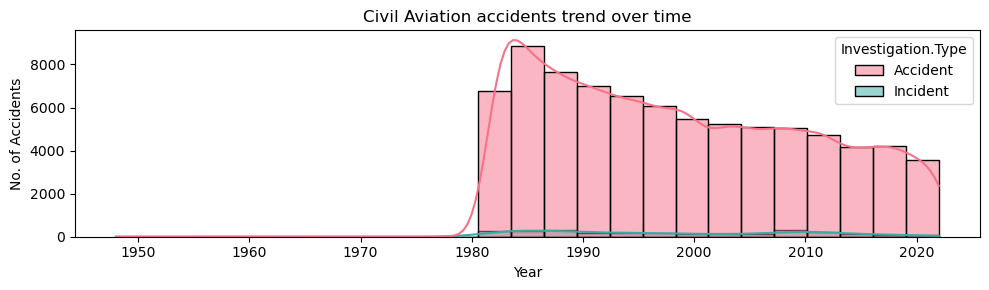

In [28]:
# Identifying Trend using Histogram, Identify distribution for Accidents and Incidents

plt.figure(figsize= (10, 3))
colors = {'G1': 'brown', 'G2': 'green'}

sns.histplot(data= data_r1, bins= 25, kde= True, palette="husl",
             x= 'Year', hue= "Investigation.Type" )
plt.title("Civil Aviation accidents trend over time")
plt.ylabel("No. of Accidents")
plt.xlabel("Year")

plt.tight_layout()
plt.show()

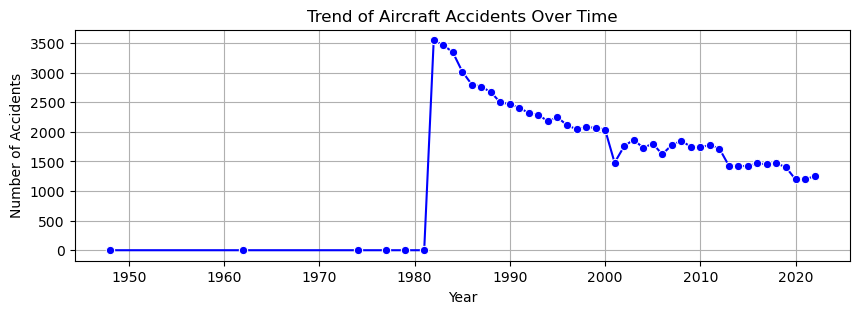

In [29]:
# Accident Trend over time i.e years

yearly_accidents = data_r1.groupby("Year").size()

plt.figure(figsize=(10,3))
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker="o", color="b")
plt.title("Trend of Aircraft Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid()
plt.show()

# Identifying monthly patterns

monthly_accidents = data_r1.groupby("Month").size()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, color="skyblue")
plt.title("Monthly Accident Trends")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(range(0,12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

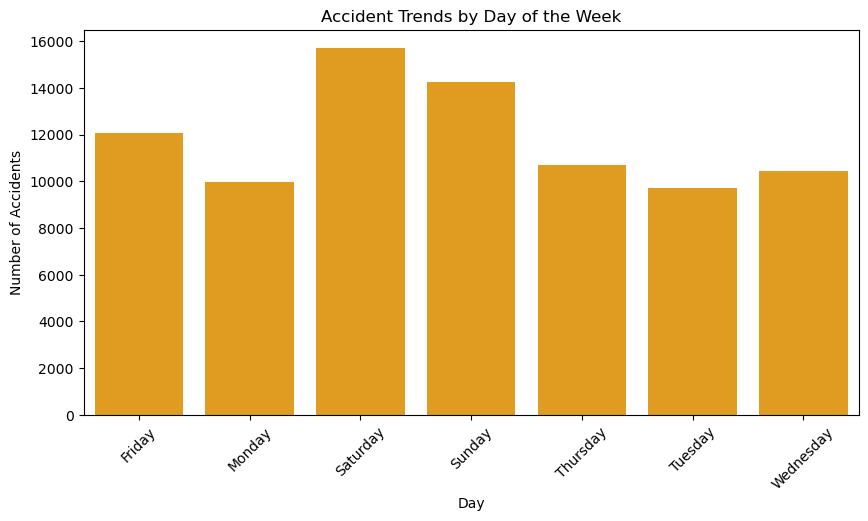

In [31]:
# Which weekdays are contributing more towards accidents

weekday_accidents = data_r1.groupby("Weekday").size()

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_accidents.index, y=weekday_accidents.values, color="orange")
plt.title("Accident Trends by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


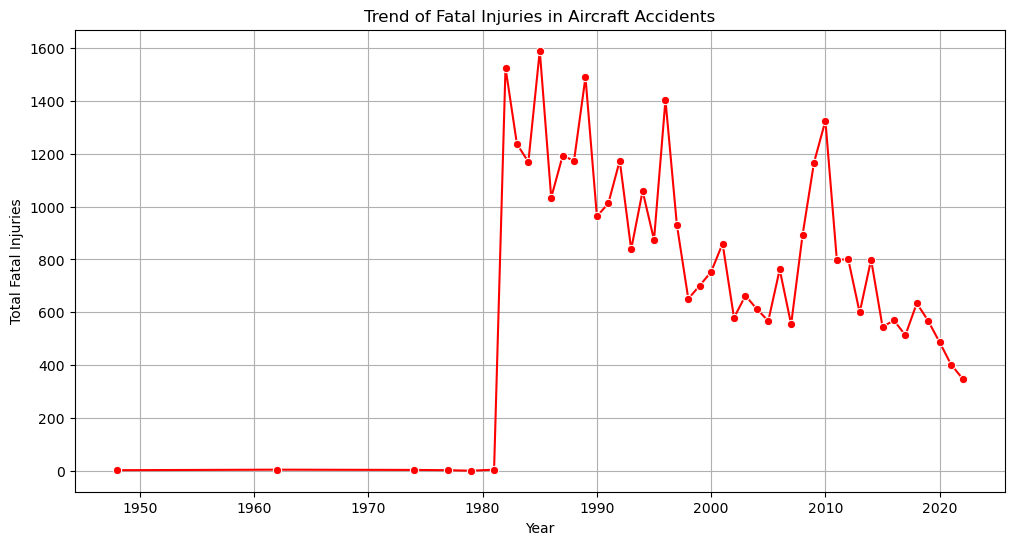

In [32]:
# No. of deaths over years

fatal_accidents = data_r1.groupby("Year")["Total.Fatal.Injuries"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=fatal_accidents.index, y=fatal_accidents.values, marker="o", color="r")
plt.title("Trend of Fatal Injuries in Aircraft Accidents")
plt.xlabel("Year")
plt.ylabel("Total Fatal Injuries")
plt.grid()
plt.show()


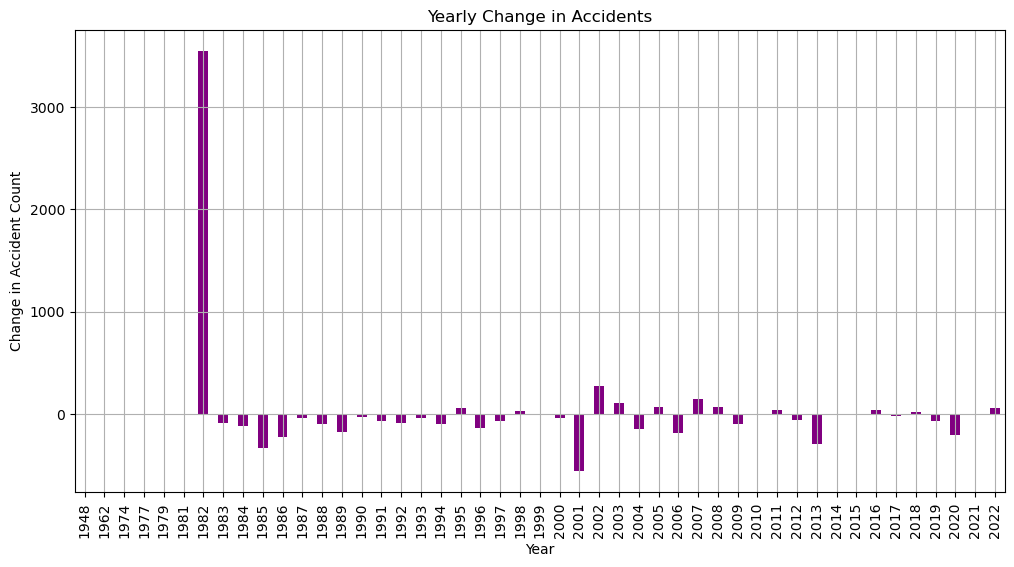

In [33]:
yearly_accidents.diff().plot(kind="bar", figsize=(12,6), color="purple")
plt.title("Yearly Change in Accidents")
plt.xlabel("Year")
plt.ylabel("Change in Accident Count")
plt.grid()
plt.show()


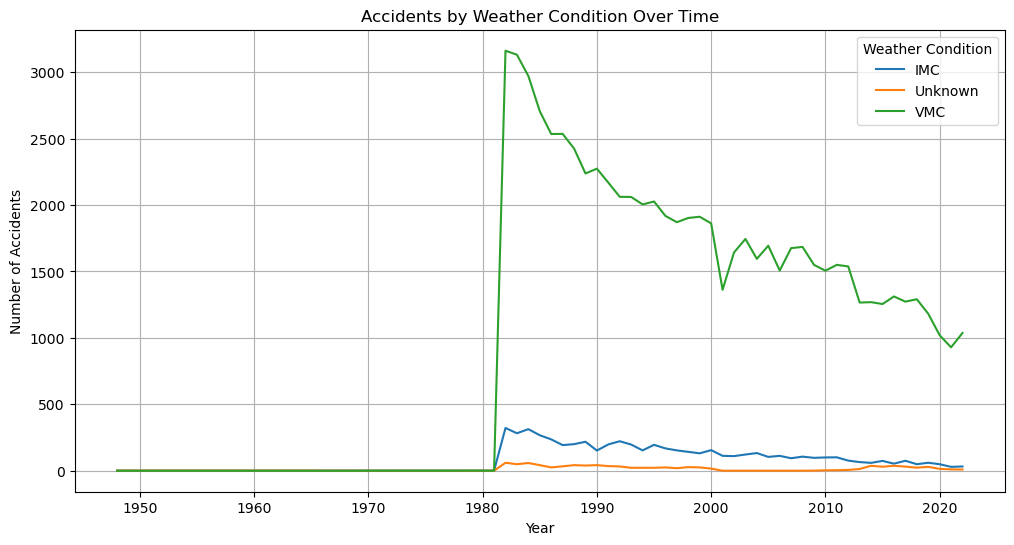

In [34]:
weather_trends = data_r1.groupby(["Year", "Weather.Condition"]).size().unstack()
weather_trends.plot(kind="line", figsize=(12,6))
plt.title("Accidents by Weather Condition Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Weather Condition")
plt.grid()
plt.show()


- **Instrument Meteorological Conditions (IMC)**: are weather conditions that require pilots to fly primarily by reference to flight instruments rather than visual cues.
- **Visual Meteorological Conditions (VMC)** are weather conditions that allow pilots to fly aircraft relying on visual references rather than instruments

# **Aircraft Accidents Trend Analysis and Observations**

## **1. Historical Trend of Civil Aircraft Accidents**
- Before **1980**, the number of civil aircraft accidents was **relatively low**, but after 1980, accidents **increased significantly**. This surge is likely due to the **mass production of aircraft** and the rapid expansion of commercial aviation.
- As the aviation industry expanded, **early challenges** were not fully predicted, leading to an **initial rise in accidents**. However, **continuous safety improvements** have gradually reduced accident rates since the late 1980s.
- Engineers in aviation **learn from mistakes**—each accident contributes to improving **aircraft design, technology, and operational procedures**.
- **Aviation safety is complex**, involving numerous variables such as **weather conditions, pilot errors, mechanical failures, and operational procedures**. A single mistake can have catastrophic consequences, making safety improvements critical.
- A similar trend can be observed in the **line plot of accident trends**, where a **rise in accidents until the 1980s** is followed by a **gradual decline** due to improved **safety regulations and technology**.

---

## **2. Seasonal Trends: Which Months Have the Most Accidents?**
- From **monthly trend analysis**, accidents **peak in July**, followed by August and June, forming a pattern that resembles a **normal distribution**.
- This peak coincides with the **rainy season** in many parts of the world, where **weather-related challenges such as storms, turbulence, and poor visibility** could contribute to accidents.
- **Safety recommendations:**
  - **Passengers**: It is advisable to **avoid non-essential travel** during these months, especially in regions prone to monsoon or stormy weather.
  - **Airlines and aviation authorities**: Stricter **operational protocols** and **weather monitoring** during these months can help reduce accident risks. Airlines should **review safety procedures and aircraft maintenance schedules** before the rainy season.
  - **Regulatory bodies**: **Stronger regulations** for flying in adverse weather could further improve safety.

---

## **3. Weekly Trends: Which Days Have the Most Accidents?**
- From **weekday trend analysis**, **Saturday and Sunday** show the **highest number of accidents**.
- **Possible reasons:**
  - **Higher passenger traffic** on weekends, leading to **increased flight frequency** and potential **operational pressure on airlines**.
  - Increased workload and **tighter flight schedules** can create **higher stress for pilots and crew**, increasing the likelihood of human error.
- **Recommendations for improved safety:**
  - Airlines should implement **better flight scheduling** to reduce stress and workload on the weekends.
  - More **rigorous operational planning** and **standardized safety protocols** should be enforced to mitigate weekend-related risks.

---

## **4. Total Fatal Injuries Over Time**
- The trend of **fatal injuries closely follows the trend of total accidents**—more accidents generally result in more deaths.
- **Deaths increased rapidly after 1980** but have since **declined**, though **spikes in fatalities** still occur in certain years.
- The **reduction in fatalities** is likely due to:
  - Improvements in **aircraft design and crash survivability**.
  - Enhanced **pilot training and operational safety measures**.
  - Stricter **aviation regulations and accident investigations**.
- However, **certain years show unusual spikes** in fatalities, which could be due to **major aviation disasters** (e.g., mass casualty accidents, structural failures, or security-related incidents).

---

## **5. Accident Trends in Different Weather Conditions**
- **Instrument Meteorological Conditions (IMC) vs. Visual Meteorological Conditions (VMC):**
  - Aircraft accidents in **IMC (instrument-based flying conditions)** are **significantly lower** than in **VMC (visual-based flying conditions)**.
  - This suggests that **relying on instruments rather than visual cues reduces the risk of accidents**.
  - **Human errors** are a major factor in accidents, and IMC conditions may force pilots to rely on instruments, which **reduces the likelihood of judgment errors due to poor visibility**.
- **Safety recommendations:**
  - **Further improvements in aircraft instrumentation** can enhance safety by minimizing pilot reliance on external visual references.
  - Encouraging the **use of automation and instrument-based navigation** in all weather conditions could further reduce accidents.
  - **Advanced training for pilots in IMC conditions** can improve their ability to handle challenging weather situations.

---

## **Additional Fact-Checked Insights**
- **Post-1980 Decline in Accidents:** According to the **International Civil Aviation Organization (ICAO)** and **FAA reports**, aviation safety has improved significantly since the late 1980s due to advancements in:
  - **Mandatory cockpit voice recorders and flight data recorders**.
  - **Introduction of better air traffic control systems**.
  - **Stricter aircraft maintenance regulations**.
  - **Implementation of Crew Resource Management (CRM) training**, which reduces human errors in decision-making.

- **Weather-related risks:**  
  - Studies show that **bad weather contributes to 20-30% of aviation accidents**, primarily during **takeoff, approach, and landing**.
  - **Modern aircraft are equipped with weather radar, autopilot, and turbulence detection systems**, significantly reducing weather-related crashes.

- **Human factors in accidents:**  
  - The **NTSB (National Transportation Safety Board)** and **Boeing safety reports** state that **human errors account for 70-80% of aviation accidents**.
  - Improving **pilot training, cockpit automation, and real-time monitoring systems** can further enhance safety.

---
Note: These were my initial observations, which were fact checked and formatted by ChatGPT for better reading and understanding.

---

## **Conclusion**
- The **rapid rise in accidents post-1980** was due to the **expansion of the aviation industry** and early challenges in predicting operational risks.
- **Accidents have declined over time** due to **continuous improvements in aircraft safety, regulations, and technology**.
- **Seasonal trends show July, August, and June as high-risk months**, likely due to **monsoon-related weather challenges**.
- **Weekend accidents are higher**, possibly due to **increased air traffic and operational stress** on airlines.
- **Instrument-based navigation (IMC) has a lower accident rate** compared to visual navigation (VMC), suggesting that better **instrumentation and automation can further reduce human errors**.
- Continued advancements in **aircraft design, pilot training, and safety regulations** will be crucial for maintaining and further improving aviation safety.

--- 



# What’s Next: How to Improve Aviation Safety Using Data Analysis?

## Identifying High-Risk Aircraft & Components

### Tasks:
- [ ] Analyze accident frequency by aircraft model (Model) and manufacturer (Make). - Completed
- [ ] Investigate if certain engine types (Engine.Type) have higher failure rates. - Completed
- [ ] Compare accident rates for single-engine vs. multi-engine aircraft. - Completed

### Expected Insights:
- Identify design flaws and reliability issues.
- Recommend safer aircraft models for airlines.

## Identifying Flight Phases with the Highest Risk

### Tasks:
- [ ] Count accidents in each phase of flight (takeoff, climb, cruise, descent, landing, etc.). - Completed
- [ ] Identify the most common causes of accidents in each phase. - Completed

### Expected Insights:
- Enhance pilot training for critical phases.
- Improve autopilot and warning systems for high-risk phases.

## Weather Conditions & Accident Probability

### Tasks:
- [ ] Compare accident rates in VMC (Visual Meteorological Conditions) vs. IMC (Instrument Meteorological Conditions). - C
- [ ] Identify weather types (fog, thunderstorms, snow) linked to more accidents.

### Expected Insights:
- Suggest stricter weather-based flight restrictions.
- Recommend instrumentation improvements for better navigation in bad weather.

In [35]:
data_r1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82872 entries, 0 to 88887
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                82872 non-null  object        
 1   Investigation.Type      82872 non-null  category      
 2   Accident.Number         82872 non-null  object        
 3   Event.Date              82872 non-null  datetime64[ns]
 4   Location                82862 non-null  object        
 5   Country                 82684 non-null  object        
 6   Latitude                33185 non-null  object        
 7   Longitude               33175 non-null  object        
 8   Airport.Code            49215 non-null  object        
 9   Airport.Name            51733 non-null  object        
 10  Injury.Severity         82672 non-null  object        
 11  Aircraft.damage         81051 non-null  category      
 12  Aircraft.Category       29771 non-null  category   

In [36]:
data['Purpose.of.flight'].value_counts().head(10)

Purpose.of.flight
Personal              49448
Instructional         10601
Unknown                6802
Aerial Application     4712
Business               4018
Positioning            1646
Other Work Use         1264
Ferry                   812
Aerial Observation      794
Public Aircraft         720
Name: count, dtype: int64

## Objective - 2: Doing Column level Analysis

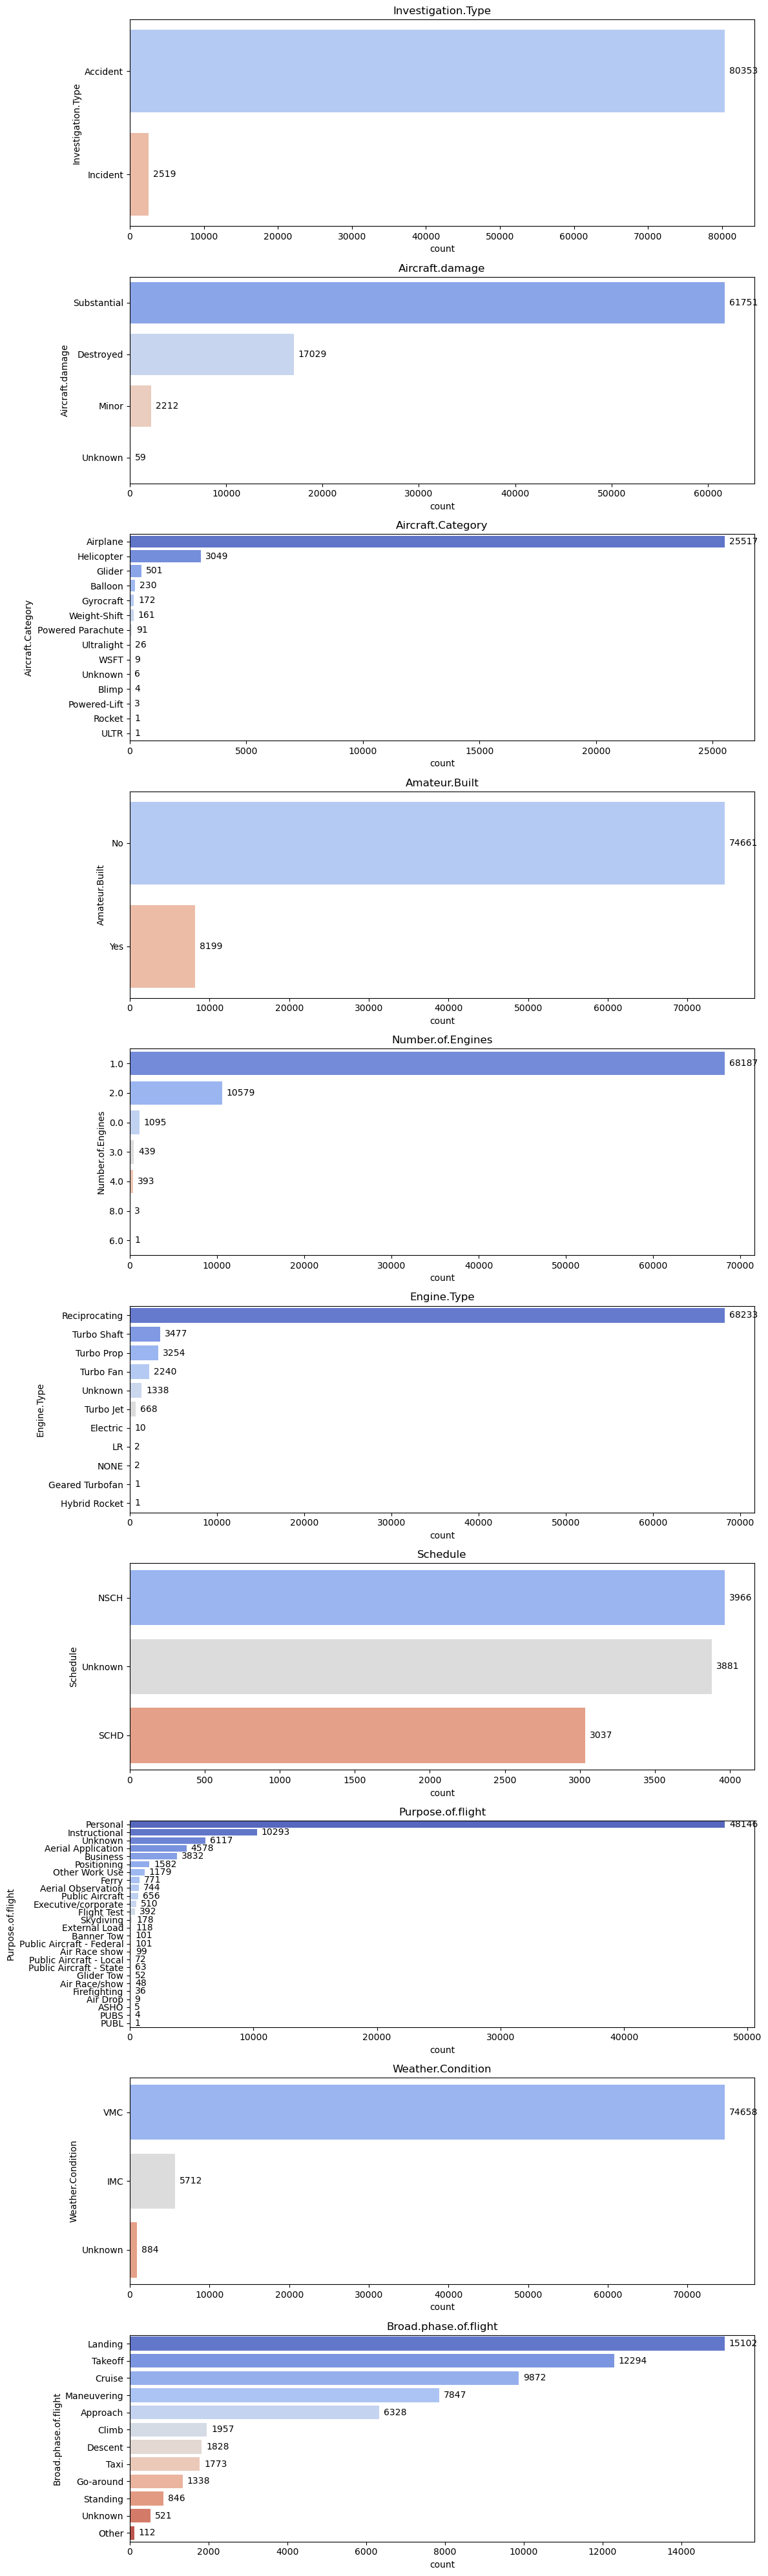

In [38]:
plt.figure(figsize=(12, 40))

for i, col in enumerate(categorical_columns, 1):       
    plt.subplot(10, 1, i)
    ax = sns.countplot(y=data_r1[col], order=data_r1[col].value_counts().index, palette="coolwarm")

    # Annotate count values on each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}',  # Convert count to integer
                    (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the center of the bar
                    ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')
    
    plt.title(col)

plt.tight_layout()
plt.show()

### Find which manufacturer is more prone to accidents

In [39]:
print("Number of unique values in Model are" ,data_r1["Model"].nunique())
print("Top 10 models that has most number of accidents")

data_r1['Model'].value_counts().head(10)

Number of unique values in Model are 11529
Top 10 models that has most number of accidents


Model
152          2273
172          1662
172N         1123
PA-28-140     905
150           800
172M          761
172P          669
180           613
182           612
PA-18         574
Name: count, dtype: int64

In [62]:
data_r1.groupby(["Make", "Model"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False).head()

,Make,Model,Count
4200,cessna,152,2273
4224,cessna,172,1659
4273,cessna,172N,1122
12674,piper,PA-28-140,905
4173,cessna,150,800


In [41]:
# Similarly for Make feature ( manufacturers)

data_r1["Make"] = data_r1["Make"].str.lower()


print("Number of unique values in Make feature are" ,data_r1["Make"].nunique())
print("Top 10 mfgs that has most number of accidents")

data_r1['Make'].value_counts().head(10)

Number of unique values in Make feature are 7355
Top 10 mfgs that has most number of accidents


Make
cessna      25914
piper       14289
beech        5153
bell         2412
boeing       1691
mooney       1281
grumman      1138
robinson     1019
bellanca     1018
hughes        887
Name: count, dtype: int64

In [42]:
# Column has many similaritites with different casing - lower() solves this
# There are many unique records so let's focus more on top 10 to 20 mfgs models.
data_r1["Make"] = data_r1["Make"].str.lower()

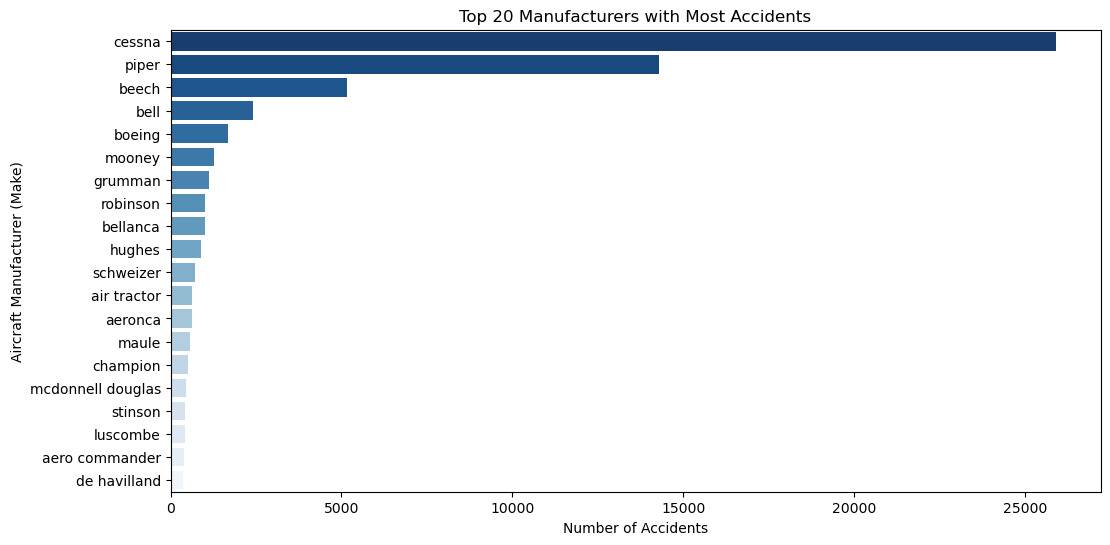

In [43]:
make_accident_counts = data_r1["Make"].value_counts().head(20)  # Show top 20 manufacturers


plt.figure(figsize=(12,6))
sns.barplot(x=make_accident_counts.values, y=make_accident_counts.index, palette="Blues_r")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Manufacturer (Make)")
plt.title("Top 20 Manufacturers with Most Accidents")
plt.show()

In [70]:
# What about Airbus

data_r1["Make"].value_counts().loc["airbus"]

161

## Accident rate by Manufacturers
- Cessna has the most number of accidents in the history summing up more than 25k. One of the reason is it is most used and produced aircraft in the world. but still it has the most number of accidents.
- Accident rate decreases half by half as we go down.
- Piper, beech, Bell, Boeing, Grumman are the pretty famous aviation manufacturers being slighlty more prone to accidents.<br><br>
**What about Airbus where does it Stand ?** 
- Airbus we can say is one of the top producer of commercial Aircrafts and safest plane. 
- There were only 161 accident from it first production that is from year 1972 falling in category of one of safest flight in the world.

In [47]:
# Count accidents in each flight phase based on different factors
phase_weather = data_r1.groupby(["Broad.phase.of.flight", "Weather.Condition"]).size().unstack()
phase_aircraft = data_r1.groupby(["Broad.phase.of.flight", "Aircraft.Category"]).size().unstack()
phase_damage = data_r1.groupby(["Broad.phase.of.flight", "Aircraft.damage"]).size().unstack()


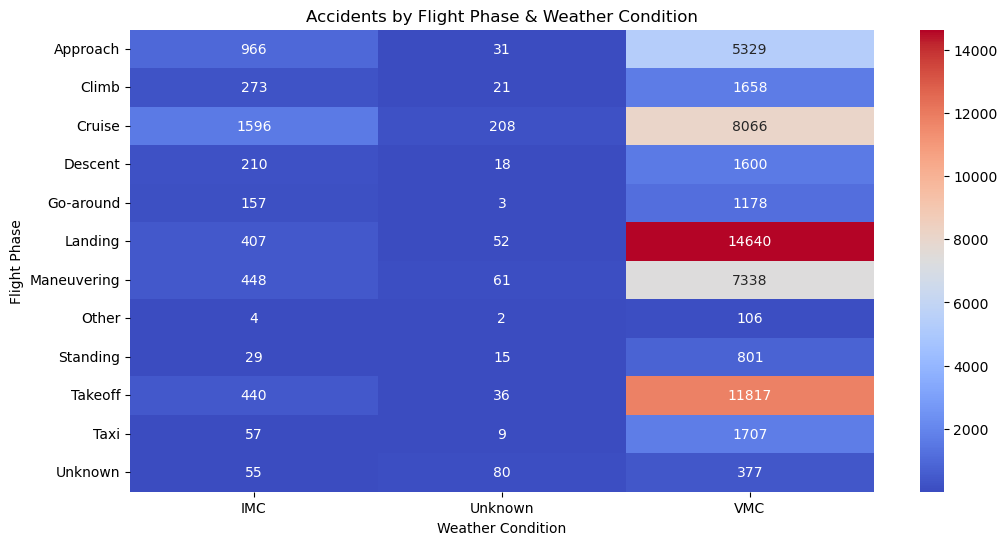

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(phase_weather, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Accidents by Flight Phase & Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Flight Phase")
plt.show()


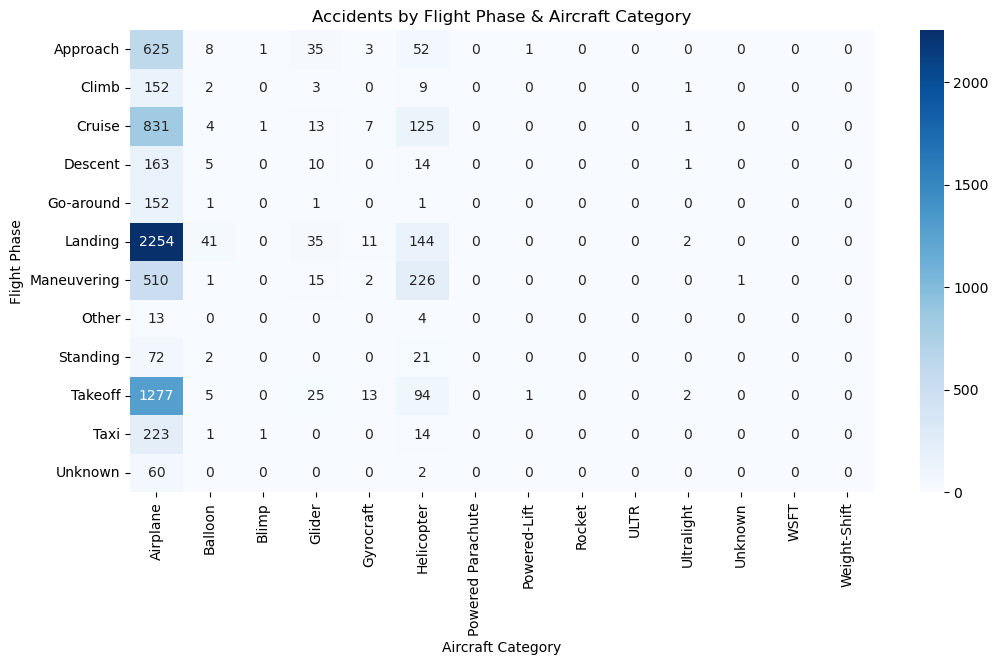

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(phase_aircraft, cmap="Blues", annot=True, fmt=".0f")
plt.title("Accidents by Flight Phase & Aircraft Category")
plt.xlabel("Aircraft Category")
plt.ylabel("Flight Phase")
plt.show()


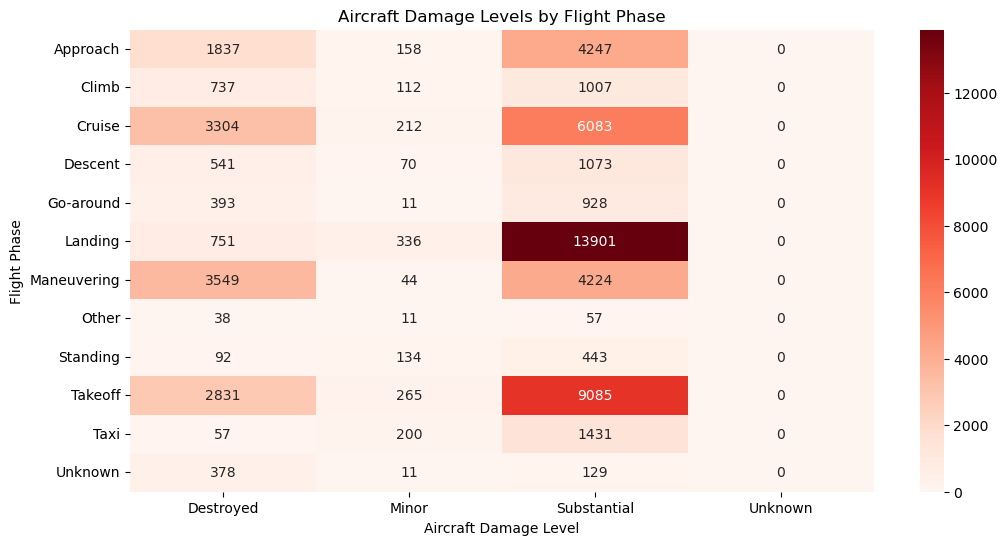

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(phase_damage, cmap="Reds", annot=True, fmt=".0f")
plt.title("Aircraft Damage Levels by Flight Phase")
plt.xlabel("Aircraft Damage Level")
plt.ylabel("Flight Phase")
plt.show()


## **Observations & Insights from Aviation Accident Data**  

### **1. Accident vs. Incident Type**  
- **90% of the dataset consists of accidents**, while only **10% are incidents**, which were primarily recorded for **research and experimental purposes**.  
- This indicates that the dataset is heavily focused on **real-world aviation failures** rather than controlled test cases.  

### **2. Aircraft Category & Accident Trends**  
- **Airplanes account for the highest number of accidents (~25,500), followed by helicopters (~3,600) and gliders (~500)**.  
- This is expected, as airplanes are the **most commonly used aircraft type** across general aviation, commercial aviation, and military operations.  
- Helicopters, despite being fewer in operation, still show a **significant accident count**, likely due to **rotor system complexity, low-altitude operation, and urban flying conditions**.  

### **3. Amateur-Built Aircraft vs. Factory-Built Aircraft**  
- **Amateur-built aircraft have fewer accidents than factory-built aircraft**, which is counterintuitive.  
- This may be due to **extra caution in maintenance and operation** by amateur builders, knowing that they assembled the aircraft themselves.  
- Factory-built aircraft, while structurally more standardized, experience **higher accident rates due to frequent usage and commercial operations**.  

### **4. Number of Engines & Accident Frequency**  
- **Single-engine aircraft account for nearly 68,000 accidents**, making them the most accident-prone category.  
- **Cessna aircraft**, which are mostly single-engine, dominate this category.  
- **Dual-engine aircraft rank second**, as they are widely used in **commercial aviation and corporate transport**.  
- **Reciprocating (piston) engines** show similar accident numbers, further confirming that **most general aviation aircraft still rely on piston-driven engines**.  

### **5. Purpose of Flight & Accident Risk**  
- Most accidents occur in **privately owned aircraft used for personal flying**.  
- Potential factors include **lack of proper pilot training, inconsistent maintenance, and relaxed regulatory oversight** compared to commercial aviation.  

### **6. Weather Conditions & Accident Rate**  
- Accidents occur **more frequently in VMC (Visual Meteorological Conditions) than IMC (Instrument Meteorological Conditions)**.  
- This suggests that **human error plays a larger role in aviation accidents**, as VMC conditions require **more reliance on pilot judgment** rather than automated systems.  
- Larger commercial aircraft (e.g., Airbus and Boeing) **are equipped with IMC systems**, making them **less susceptible to weather-related risks** compared to smaller aircraft like Cessna and Beechcraft, which **lack advanced avionics**.  

### **7. Flight Phase & Accident Frequency**  
- **Takeoff and landing are the most accident-prone phases**, regardless of weather conditions.  
- These phases involve **complex maneuvers, high pilot workload, and increased exposure to mechanical failures**.  
- **Aircraft destruction is most common in the maneuvering phase**, where aircraft operate at **higher speeds and altitudes**, making recovery from failures more difficult.  

### **8. Aircraft Damage Severity & Flight Phase**  
- **Substantial damage is more common than total destruction**, with most cases occurring during:  
  - **Landing**  
  - **Takeoff**  
  - **Cruise phase (likely due to turbulence or minor system failures)**  
- **Total destruction is most common in the maneuvering phase**, possibly due to:  
  - **Mid-air collisions or loss of control at high altitude**.  
  - **Structural failures leading to catastrophic breakups**.  

---

## **Conclusions & Recommendations**  

1. **Enhancing Pilot Training for Critical Flight Phases**  
   - Since **takeoff and landing are the riskiest phases**, training programs should place **greater emphasis on emergency procedures, runway handling, and adverse weather landings**.  
   - Pilots operating **single-engine and general aviation aircraft** should receive **additional training for engine failure scenarios**.  

2. **Strengthening Regulations for Private Aircraft Operators**  
   - Private aircraft accidents are disproportionately high, likely due to **insufficient pilot training and inconsistent maintenance practices**.  
   - Regulatory authorities should consider **stricter licensing requirements, mandatory refresher training, and scheduled maintenance inspections** for private aircraft owners.  

3. **Improving Safety in Single-Engine Aircraft**  
   - Single-engine aircraft account for the majority of accidents, emphasizing the need for **better engine reliability standards and emergency landing protocols**.  
   - Adoption of **modern avionics and autopilot systems** in general aviation should be encouraged to assist pilots in **critical situations**.  

4. **Advancing Weather Navigation & IMC Technology**  
   - Given that **VMC accidents are more frequent than IMC accidents**, this highlights the need for **better training in visual flight conditions**.  
   - Encouraging **broader adoption of GPS-based navigation, autopilot, and weather monitoring systems** in small aircraft can significantly reduce human error-related accidents.  

5. **Focusing on High-Risk Aircraft Categories**  
   - Airplanes and helicopters dominate accident statistics, but **accident severity differs** between the two.  
   - More research should be conducted into **helicopter failure patterns**, as their **low-altitude operations and rotor system failures** pose unique challenges.  
   - For **airplanes**, emphasis should be placed on **improving stall recovery training and landing gear reliability**.  

6. **Enhancing Crash Survivability Through Better Aircraft Design**  
   - The high number of **substantial damage cases in landing and takeoff accidents** suggests that improvements in **landing gear design, braking systems, and ground proximity alerts** could prevent aircraft from sustaining critical damage.  
   - Advanced **impact-resistant materials and structural reinforcements** should be integrated into aircraft designs to reduce fatalities.  

7. **Improving Maintenance Standards for Reciprocating Engines**  
   - The fact that **reciprocating (piston) engines have accident counts similar to single-engine aircraft** suggests a possible connection between **engine failures and maintenance practices**.  
   - More rigorous **engine inspection and maintenance guidelines** should be enforced, particularly for **older general aviation aircraft still using piston engines**.  

8. **Investigating High-Altitude Accidents in the Maneuvering Phase**  
   - Maneuvering-phase accidents that result in **total aircraft destruction** need further investigation.  
   - Potential factors include **structural failures, aerodynamic stall, or loss of control due to high speeds**.  
   - Data analysis should focus on identifying **specific aircraft types and operational patterns** associated with high-altitude failures.  

By implementing these recommendations, aviation authorities, manufacturers, and flight training organizations can significantly **enhance safety measures, reduce accident rates, and improve overall flight reliability**.

# What Can we do further:
## Predicting Accident Probability Using Machine Learning

### Tasks:
- [ ] Select target variable: Binary classification (Accident vs. No Accident).
- [ ] Train a Random Forest or XGBoost model on accident-related features.
- [ ] Deploy the model to predict accident probability for new flights.

### Expected Insights:
- Provide risk scores for flights to optimize operations and safety measures.

## Geospatial Analysis of High-Risk Regions

### Tasks:
- [ ] Create heatmaps of accident locations using Latitude & Longitude.
- [ ] Identify high-risk airports (Airport.Code, Airport.Name).

### Expected Insights:
- Strengthen safety regulations in accident-prone areas.
- Identify airports needing infrastructure improvements.

## Understanding Human Error & Operational Factors

### Tasks:
- [ ] Investigate accidents caused by pilot error vs. technical failure.
- [ ] Compare accidents in commercial vs. private aircraft (FAR.Description).
- [ ] Analyze accident rates in amateur-built (Amateur.Built) vs. professionally manufactured aircraft.

### Expected Insights:
- Recommend improvements in pilot training and automation.
- Advocate for stricter maintenance policies.

## Improving Crash Survivability

### Tasks:
- [ ] Compare Aircraft.damage levels (Destroyed, Substantial, Minor).
- [ ] Analyze seat belt usage, emergency exits, and fire safety factors.

### Expected Insights:
- Suggest crash-resistant aircraft design improvements.
- Enhance emergency response planning.

## Anomaly Detection for Potential Safety Risks

### Tasks:
- [ ] Apply K-Means or DBSCAN clustering to group similar accidents.
- [ ] Identify outliers where an accident doesn’t fit normal patterns.

### Expected Insights:
- Detect potential risks before they lead to accidents.
- Support proactive investigation by aviation authorities.
